In [9]:
import scanpy as sc

In [10]:
adata = sc.read("results/adata_raw_CCL_LCL/anndata_annotation_harmony_celltypist.h5ad")

In [11]:
adata_sub = sc.read(
    "results/adata_raw_CCL_LCL/nmf_subtype/anndata_nmf_subtype_harmony_celltypist_Macrophages.h5ad"
)

In [16]:
# 确保两个数据框的类别一致
# 先将两个数据框的类别转换为字符串
adata_sub.obs["cNMF_cluster"] = "Macrophages-"+adata_sub.obs["cNMF_cluster"].astype(str)
adata.obs["celltypist"] = adata.obs["celltypist"].astype(str)

# 然后更新原始数据集
adata.obs.loc[adata_sub.obs.index, "celltypist"] = adata_sub.obs["cNMF_cluster"]

# 将更新后的列转换回类别型
adata.obs["celltypist"] = adata.obs["celltypist"].astype("category")

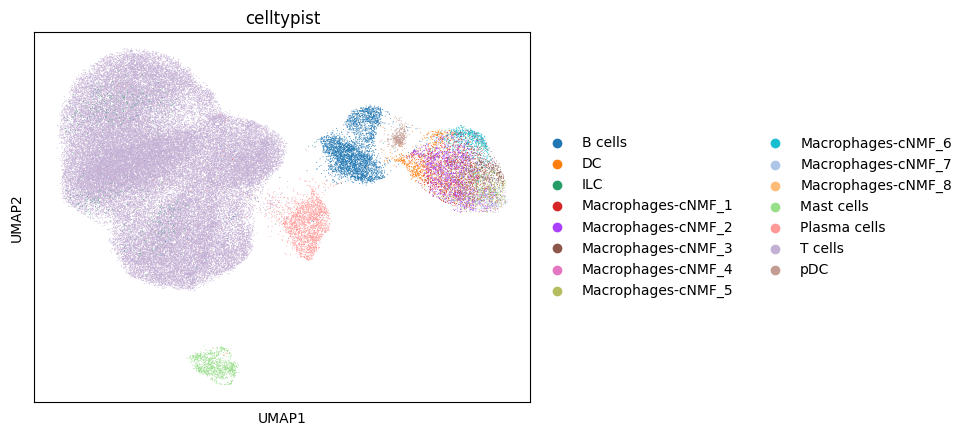

In [17]:
sc.pl.umap(adata, color="celltypist")

In [18]:
adata.write_h5ad("anndata.h5ad")